# Business Understanding

Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

## Stakeholder and Evaluation metric

*TBA*

# Basics

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.cluster import KMeans

RSEED=33

In [2]:
# load data

original_train = pd.read_csv('data/Train.csv')
original_test = pd.read_csv('data/Test.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [3]:
variables

Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming and Fishi...

In [4]:
original_train.columns = ["country", "year", "uniqueid", "bank_account", "location", "cellphone", "household", "age", "gender", "status_household", "marital_status", "education", "job"]
original_train.head(2)

country  year    uniqueid bank_account location cellphone  household  age  \
0   Kenya  2018  uniqueid_1          Yes    Rural       Yes          3   24   
1   Kenya  2018  uniqueid_2           No    Rural        No          5   70   

   gender   status_household           marital_status            education  \
0  Female             Spouse  Married/Living together  Secondary education   
1  Female  Head of Household                  Widowed  No formal education   

                    job  
0         Self employed  
1  Government Dependent

In [5]:
original_train.shape

(23524, 13)

In [6]:
# check for missing values 

original_train.isnull().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [7]:
original_train.isna().sum()

country             0
year                0
uniqueid            0
bank_account        0
location            0
cellphone           0
household           0
age                 0
gender              0
status_household    0
marital_status      0
education           0
job                 0
dtype: int64

In [8]:
# check for unique values (to detect duplicates)

original_train.nunique()

country                4
year                   3
uniqueid            8735
bank_account           2
location               2
cellphone              2
household             20
age                   85
gender                 2
status_household       6
marital_status         5
education              6
job                   10
dtype: int64

In [9]:
original_train['uniqueid'].duplicated().sum()

14789

In [10]:
original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           23524 non-null  object
 1   year              23524 non-null  int64 
 2   uniqueid          23524 non-null  object
 3   bank_account      23524 non-null  object
 4   location          23524 non-null  object
 5   cellphone         23524 non-null  object
 6   household         23524 non-null  int64 
 7   age               23524 non-null  int64 
 8   gender            23524 non-null  object
 9   status_household  23524 non-null  object
 10  marital_status    23524 non-null  object
 11  education         23524 non-null  object
 12  job               23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# EDA

## Hypotheses 

Likeliness to have a bank account:

- country: more developed country higher than less developed country (Kenya, Tanzania, Rwanda, Uganda according to HDI)
- location_type: urban more likely than rural 
- cellphone_access: cellphone more likely than no cellphone
- household_size: the bigger the household, the less likely that this individual has a bank account (househould shares one account)
- age: younger more likely than older 
- gender: men/women balanced 
- relationship_with_head: head of household more likely than anyone else in family 
- marital_status: many different effects equal each other so the impact is low 
- education: higher education more likely than lower 
- job_level: higher job level more likely than lower 
- irrelevant: uniqueid, year

In [11]:
original_train.describe()

year     household           age
count  23524.000000  23524.000000  23524.000000
mean    2016.975939      3.797483     38.805220
std        0.847371      2.227613     16.520569
min     2016.000000      1.000000     16.000000
25%     2016.000000      2.000000     26.000000
50%     2017.000000      3.000000     35.000000
75%     2018.000000      5.000000     49.000000
max     2018.000000     21.000000    100.000000

In [12]:
original_train['bank_account'].value_counts(normalize=True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

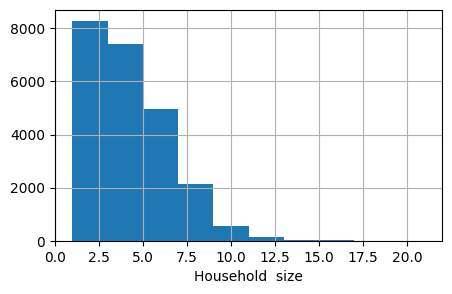

In [13]:
plt.figure(figsize=(5, 3))
original_train.household.hist() 
plt.xlabel('Household  size');

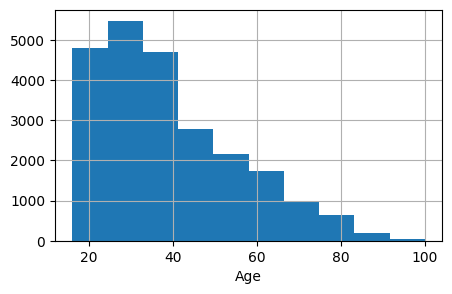

In [14]:
plt.figure(figsize=(5, 3))
original_train.age.hist() 
plt.xlabel('Age');

In [15]:
### add more plots about distributions here, see notebook "Johanna"

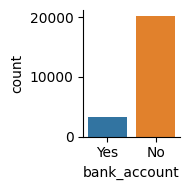

In [16]:
sns.catplot(x="bank_account", kind="count", data=original_train, height=2)

In [17]:
features = ['country','location', 'cellphone','gender', 'status_household', 'marital_status','education', 'job']

for i in features:
    print(original_train[i].value_counts(normalize=True).round(2))

Rwanda      0.37
Tanzania    0.28
Kenya       0.26
Uganda      0.09
Name: country, dtype: float64
Rural    0.61
Urban    0.39
Name: location, dtype: float64
Yes    0.74
No     0.26
Name: cellphone, dtype: float64
Female    0.59
Male      0.41
Name: gender, dtype: float64
Head of Household      0.55
Spouse                 0.28
Child                  0.09
Parent                 0.05
Other relative         0.03
Other non-relatives    0.01
Name: status_household, dtype: float64
Married/Living together    0.46
Single/Never Married       0.34
Widowed                    0.12
Divorced/Seperated         0.09
Dont know                  0.00
Name: marital_status, dtype: float64
Primary education                  0.54
No formal education                0.19
Secondary education                0.18
Tertiary education                 0.05
Vocational/Specialised training    0.03
Other/Dont know/RTA                0.00
Name: education, dtype: float64
Self employed                   0.27
Informally empl

In [18]:
d = {}
for i in features:
    d[i] = pd.crosstab(original_train[i], original_train['bank_account'], normalize='index').mul(100).round(2)

In [19]:
d['country']

bank_account     No    Yes
country                   
Kenya         74.93  25.07
Rwanda        88.52  11.48
Tanzania      90.83   9.17
Uganda        91.39   8.61

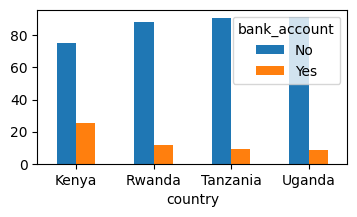

In [20]:
d['country'].plot.bar(figsize=(4,2), rot=0);

In [21]:
d['location']

bank_account     No    Yes
location                  
Rural         88.35  11.65
Urban         82.13  17.87

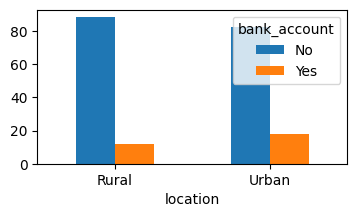

In [22]:
d['location'].plot.bar(figsize=(4,2), rot=0);

In [23]:
d['cellphone']

bank_account     No    Yes
cellphone                 
No            98.29   1.71
Yes           81.62  18.38

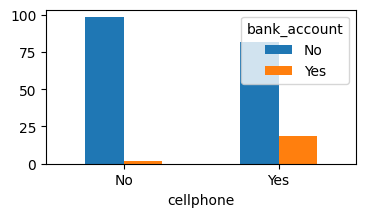

In [24]:
d['cellphone'].plot.bar(figsize=(4,2), rot=0);

In [25]:
d['gender']

bank_account     No    Yes
gender                    
Female        89.32  10.68
Male          81.03  18.97

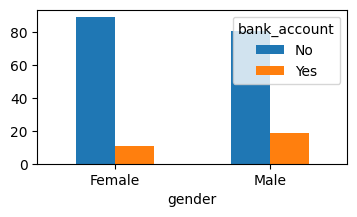

In [26]:
d['gender'].plot.bar(figsize=(4,2), rot=0);

In [27]:
d['status_household']

bank_account            No    Yes
status_household                 
Child                91.34   8.66
Head of Household    82.29  17.71
Other non-relatives  89.47  10.53
Other relative       90.12   9.88
Parent               94.01   5.99
Spouse               89.34  10.66

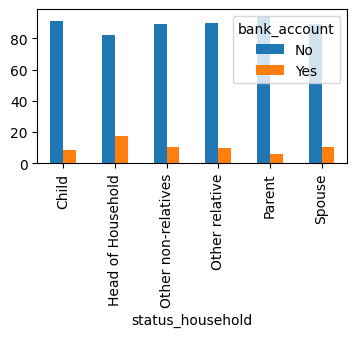

In [28]:
d['status_household'].plot.bar(figsize=(4,2), rot=90);

In [29]:
d['marital_status'].head(10)

bank_account                No    Yes
marital_status                       
Divorced/Seperated       88.73  11.27
Dont know                75.00  25.00
Married/Living together  82.64  17.36
Single/Never Married     87.90  12.10
Widowed                  90.99   9.01

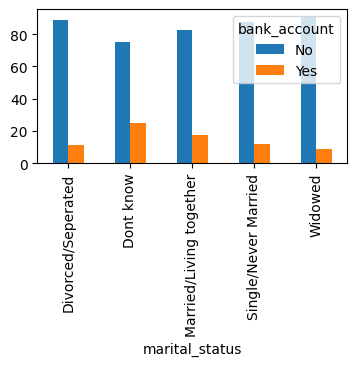

In [30]:
d['marital_status'].plot.bar(figsize=(4,2), rot=90);

In [31]:
d['education']

bank_account                        No    Yes
education                                    
No formal education              96.10   3.90
Other/Dont know/RTA              68.57  31.43
Primary education                91.45   8.55
Secondary education              76.72  23.28
Tertiary education               48.92  51.08
Vocational/Specialised training  42.96  57.04

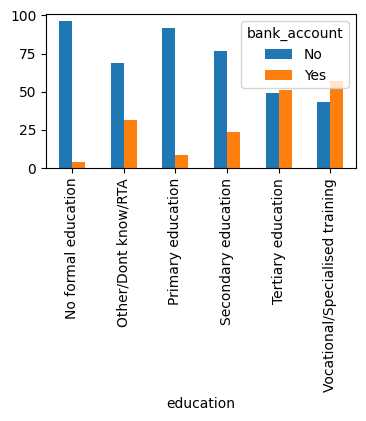

In [32]:
d['education'].plot.bar(figsize=(4,2), rot=90);

In [33]:
d['job']

bank_account                     No    Yes
job                                       
Dont Know/Refuse to answer    88.89  11.11
Farming and Fishing           88.33  11.67
Formally employed Government  22.48  77.52
Formally employed Private     45.88  54.12
Government Dependent          79.76  20.24
Informally employed           92.05   7.95
No Income                     97.93   2.07
Other Income                  81.85  18.15
Remittance Dependent          90.50   9.50
Self employed                 86.83  13.17

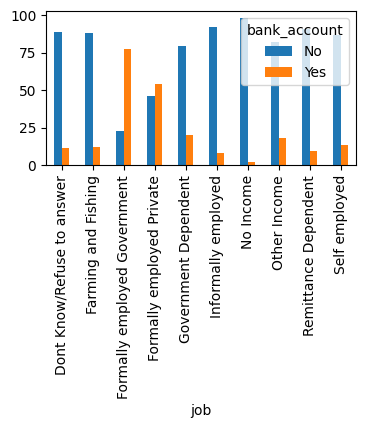

In [34]:
d['job'].plot.bar(figsize=(4,2), rot=90);

In [35]:
df_edu_job = pd.crosstab(original_train['job'], original_train['education'], normalize='index').mul(100).round(2)
df_edu_job.head(10)

education                     No formal education  Other/Dont know/RTA  \
job                                                                      
Dont Know/Refuse to answer                  14.29                 0.00   
Farming and Fishing                         25.82                 0.00   
Formally employed Government                 1.03                 0.52   
Formally employed Private                    3.13                 0.19   
Government Dependent                        53.04                 0.40   
Informally employed                         20.19                 0.29   
No Income                                   18.50                 0.48   
Other Income                                17.04                 0.28   
Remittance Dependent                        19.55                 0.08   
Self employed                               15.54                 0.09   

education                     Primary education  Secondary education  \
job                                                                    
Dont Know/Refuse to answer                59.52                23.81   
Farming and Fishing                       55.25                16.21   
Formally employed Government              10.85                33.59   
Formally employed Private                 31.00                25.12   
Government Dependent                      37.25                 3.64   
Informally employed                       60.87                14.11   
No Income                                 49.92                22.49   
Other Income                              47.78                26.39   
Remittance Dependent                      37.87                31.78   
Self employed                             63.01                13.80   

education                     Tertiary education  \
job                                                
Dont Know/Refuse to answer                  1.59   
Farming and Fishing                         0.97   
Formally employed Government               31.27   
Formally employed Private                  21.23   
Government Dependent                        3.24   
Informally employed                         3.14   
No Income                                   7.50   
Other Income                                4.35   
Remittance Dependent                        6.89   
Self employed                               4.74   

education                     Vocational/Specialised training  
job                                                            
Dont Know/Refuse to answer                               0.79  
Farming and Fishing                                      1.75  
Formally employed Government                            22.74  
Formally employed Private                               19.34  
Government Dependent                                     2.43  
Informally employed                                      1.39  
No Income                                                1.12  
Other Income                                             4.17  
Remittance Dependent                                     3.84  
Self employed                                            2.83

<AxesSubplot:xlabel='job'>

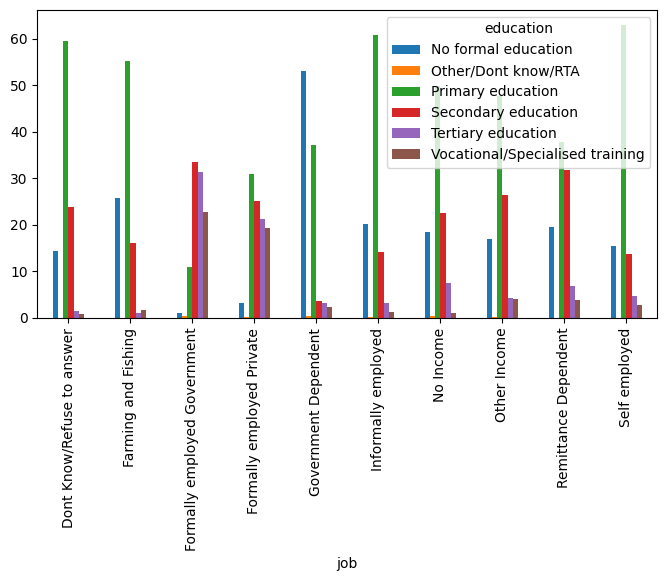

In [36]:
df_edu_job.plot.bar(figsize=(8,4), rot=90)

### Data Cleaning, Preprocessing #1

In [37]:
original_train.head(2)

country  year    uniqueid bank_account location cellphone  household  age  \
0   Kenya  2018  uniqueid_1          Yes    Rural       Yes          3   24   
1   Kenya  2018  uniqueid_2           No    Rural        No          5   70   

   gender   status_household           marital_status            education  \
0  Female             Spouse  Married/Living together  Secondary education   
1  Female  Head of Household                  Widowed  No formal education   

                    job  
0         Self employed  
1  Government Dependent

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [39]:
#convert target variable to numeric
le = LabelEncoder()
original_train['bank_account'] = le.fit_transform(original_train['bank_account'])

In [40]:
#Separate training features from target
X_train = original_train.drop(['bank_account'], axis=1)
y_train = original_train['bank_account']

In [41]:
X_train = X_train.drop(["uniqueid", "year"], axis=1)

country_dummies = pd.get_dummies(X_train['country'], prefix='country', drop_first=True)
location_dummies = pd.get_dummies(X_train['location'], prefix='location', drop_first=True)
cellphone_dummies = pd.get_dummies(X_train['cellphone'], prefix='cellphone', drop_first=True)
gender_dummies = pd.get_dummies(X_train['gender'], prefix='gender', drop_first=True)
marital_status_dummies = pd.get_dummies(X_train['marital_status'], prefix='marital_status', drop_first=True)
job_dummies = pd.get_dummies(X_train['job'], prefix='job', drop_first=True)
status_household_dummies = pd.get_dummies(X_train['status_household'], prefix='status_household', drop_first=True)

X_train = pd.concat([X_train, country_dummies, location_dummies, cellphone_dummies, gender_dummies, marital_status_dummies, job_dummies, status_household_dummies], axis=1)

edu_mapping = {'No formal education': 0, 
               'Primary education' : 2, 
               'Other/Dont know/RTA': 1,
               'Vocational/Specialised training': 4, 
               'Secondary education': 3, 
               'Tertiary education' : 5}

X_train = X_train.assign(edu_cat = X_train.education.map(edu_mapping))

X_train = X_train.drop(['country', 'location', 'cellphone', 'gender', 'marital_status', 'education', 'job', 'status_household'], axis=1)

In [42]:
X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, stratify = y_train, 
                                                  test_size = 0.3, random_state=RSEED)

In [43]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where

counter = Counter(y_Train)
print(counter)

Counter({0: 14148, 1: 2318})


In [44]:
over = SMOTE(sampling_strategy=0.3, random_state=RSEED)

In [45]:
X_Train, y_Train = over.fit_resample(X_Train, y_Train)

In [46]:
counter = Counter(y_Train)
print(counter)

Counter({0: 14148, 1: 4244})


In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
processed_X_Train = pd.DataFrame(scaler.fit_transform(X_Train),index=X_Train.index, columns=X_Train.columns)

In [48]:
processed_X_Val = pd.DataFrame(scaler.transform(X_Val),index=X_Val.index, columns=X_Val.columns)

In [49]:
processed_X_Val

household       age  country_Rwanda  country_Tanzania  country_Uganda  \
22542   0.263158  0.642857             0.0               0.0             1.0   
3683    0.000000  0.464286             0.0               0.0             0.0   
19199   0.052632  0.130952             0.0               1.0             0.0   
14130   0.157895  0.226190             1.0               0.0             0.0   
16634   0.052632  0.202381             0.0               1.0             0.0   
...          ...       ...             ...               ...             ...   
7085    0.157895  0.238095             1.0               0.0             0.0   
21179   0.157895  0.142857             0.0               1.0             0.0   
14315   0.000000  0.095238             1.0               0.0             0.0   
13042   0.210526  0.297619             1.0               0.0             0.0   
13768   0.368421  0.214286             1.0               0.0             0.0   

       location_Urban  cellphone_Yes  gender_Male  marital_status_Dont know  \
22542             0.0            1.0          0.0                       0.0   
3683              1.0            1.0          0.0                       0.0   
19199             1.0            1.0          1.0                       0.0   
14130             0.0            1.0          0.0                       0.0   
16634             1.0            1.0          0.0                       0.0   
...               ...            ...          ...                       ...   
7085              0.0            0.0          0.0                       0.0   
21179             1.0            0.0          0.0                       0.0   
14315             0.0            0.0          1.0                       0.0   
13042             0.0            1.0          0.0                       0.0   
13768             0.0            1.0          0.0                       0.0   

       marital_status_Married/Living together  ...  job_No Income  \
22542                                     1.0  ...            0.0   
3683                                      0.0  ...            0.0   
19199                                     0.0  ...            0.0   
14130                                     1.0  ...            0.0   
16634                                     0.0  ...            0.0   
...                                       ...  ...            ...   
7085                                      0.0  ...            0.0   
21179                                     0.0  ...            0.0   
14315                                     0.0  ...            0.0   
13042                                     1.0  ...            0.0   
13768                                     0.0  ...            0.0   

       job_Other Income  job_Remittance Dependent  job_Self employed  \
22542               0.0                       0.0                1.0   
3683                0.0                       0.0                1.0   
19199               0.0                       0.0                1.0   
14130               0.0                       0.0                0.0   
16634               0.0                       0.0                1.0   
...                 ...                       ...                ...   
7085                0.0                       0.0                0.0   
21179               0.0                       0.0                1.0   
14315               0.0                       0.0                0.0   
13042               0.0                       0.0                0.0   
13768               0.0                       0.0                0.0   

       status_household_Head of Household  \
22542                                 1.0   
3683                                  1.0   
19199                                 1.0   
14130                                 0.0   
16634                                 0.0   
...                                   ...   
7085                                  1.0   
21179                                 0.0  

# Model 1 Decision Tree

In [50]:
Tree = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=RSEED)
Tree.fit(processed_X_Train, y_Train) 

DecisionTreeClassifier(max_depth=15, random_state=33)

In [105]:
y_pred_Train_tree = Tree.predict(processed_X_Train)
y_pred_Val_tree = Tree.predict(processed_X_Val)
y_pred_Val_tree_proba = Tree.predict_proba(processed_X_Val)

In [106]:
y_pred_Val_tree_proba = y_pred_Val_tree_proba[:, 1]

In [52]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_tree))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_tree))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_tree, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_tree, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_tree, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_tree, pos_label=1))

Accuracy Train:  0.9305132666376685
Accuracy Test:  0.8451402663644092
F1-score Train:  0.8430361090641122
F1-score Test:  0.45322661330665326
Recall Train:  0.8086710650329878
Recall Test:  0.4557344064386318


In [53]:
cfm_tree = metrics.confusion_matrix(y_Val, y_pred_Val_tree)

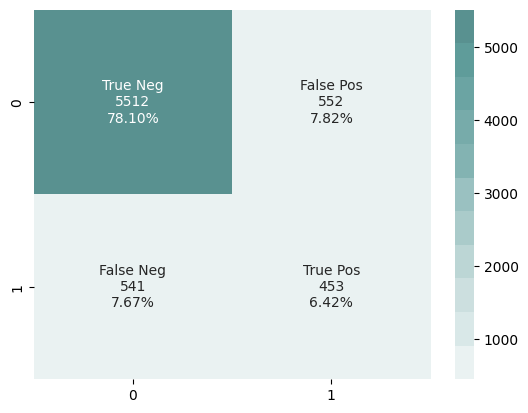

In [202]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_tree.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_tree.flatten()/np.sum(cfm_tree)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_tree, annot=labels, fmt='', cmap=color_cfm);

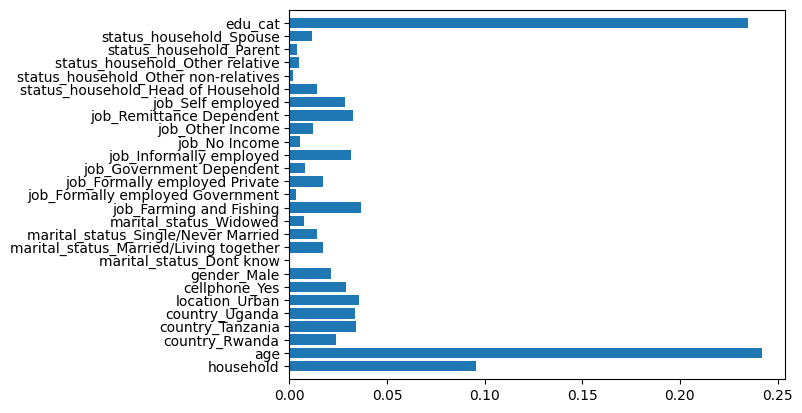

In [55]:
def plot_feature_importances(model):
    n_features = X_Train.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),X_train.columns)
    plt.ylim(-1,n_features)
    
plot_feature_importances(Tree)

# XGB

In [56]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [144]:
xgb = XGBClassifier(subsample= 0.5,scale_pos_weight=3,min_child_weight=7,max_depth= 6,learning_rate= 0.25, gamma= 0.3, colsample_bytree= 0.4)

In [145]:
xgb.fit(processed_X_Train, y_Train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [146]:
y_pred_Train_xgb = xgb.predict(processed_X_Train)
y_pred_Val_xgb = xgb.predict(processed_X_Val)
y_pred_Val_xgb_proba = xgb.predict_proba(processed_X_Val)

In [147]:
y_pred_Val_xgb_proba = y_pred_Val_xgb_proba[:, 1]

In [148]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_xgb))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, y_pred_Val_xgb))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, y_pred_Val_xgb, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, y_pred_Val_xgb, pos_label=1))

Accuracy Train:  0.8464549804262723
Accuracy Test:  0.8197789742136583
F1-score Train:  0.7142857142857143
F1-score Test:  0.508500772797527
Recall Train:  0.8317624882186616
Recall Test:  0.6619718309859155


In [61]:
cfm_xgb = metrics.confusion_matrix(y_Val, y_pred_Val_xgb)

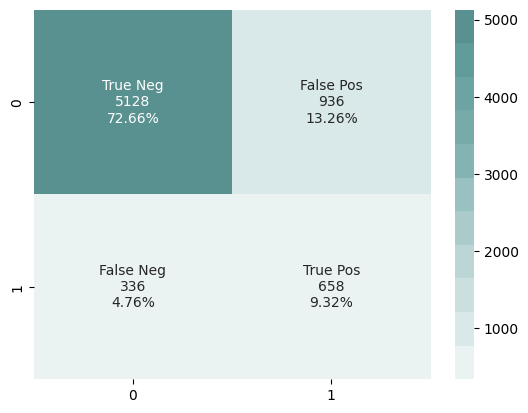

In [200]:
color_cfm = ['#eaf2f2', '#d9e8e8', '#ccdfdf', '#bcd6d5', "#aacbca", '#9ac1c1', '#83b3b2', '#77abaa', '#6ba4a3', '#5f9c9a', '#599190']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_xgb.flatten()/np.sum(cfm_xgb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_xgb, annot=labels, fmt='', cmap = color_cfm);

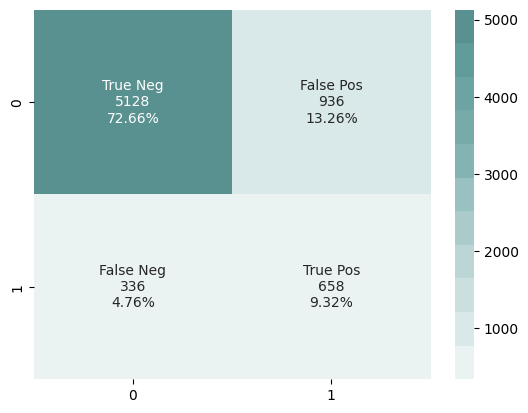

In [205]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_xgb.flatten()/np.sum(cfm_xgb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_xgb, annot=labels, fmt='', cmap = color_cfm);

### with own threshold

In [121]:
def own_prediction(probabilities, threshold):
    new_list = []
    for i in probabilities:
        if i >= threshold:
            new_list.append(1)
        else:
            new_list.append(0)
    return new_list

In [134]:
own_y_pred_Val_xgb = own_prediction(y_pred_Val_xgb_proba, 0.3)

In [135]:
print('Accuracy Train: ',metrics.accuracy_score(y_Train, y_pred_Train_xgb))
print('Accuracy Test: ',metrics.accuracy_score(y_Val, own_y_pred_Val_xgb))
print('F1-score Train: ',metrics.f1_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('F1-score Test: ',metrics.f1_score(y_Val, own_y_pred_Val_xgb, pos_label=1))
print('Recall Train: ',metrics.recall_score(y_Train, y_pred_Train_xgb, pos_label=1))
print('Recall Test: ',metrics.recall_score(y_Val, own_y_pred_Val_xgb, pos_label=1))

Accuracy Train:  0.8464549804262723
Accuracy Test:  0.7133748937376028
F1-score Train:  0.7142857142857143
F1-score Test:  0.44681432868471427
Recall Train:  0.8317624882186616
Recall Test:  0.8219315895372233


In [136]:
cfm_xgb_own_trs = metrics.confusion_matrix(y_Val, own_y_pred_Val_xgb)

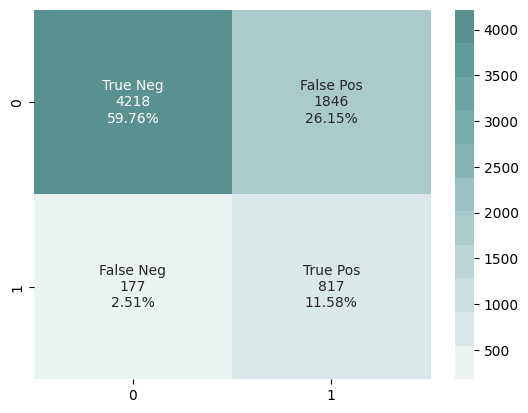

In [204]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_xgb_own_trs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_xgb_own_trs.flatten()/np.sum(cfm_xgb_own_trs)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_xgb_own_trs, annot=labels, fmt='', cmap= color_cfm);

### Hyper Parameter Tuning

In [63]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "subsample" : [0.5, 1],
    "scale_pos_weight" : [1, 3, 6, 10, 15]
    }

In [64]:
rs_model=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [65]:
rs_model.fit(processed_X_Train,y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.3, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...
                                           num_parallel_tree=None,
                            

In [66]:
rs_model.best_params_

{'subsample': 1,
 'scale_pos_weight': 10,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [138]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RSEED)
scores = cross_val_score(xgb, processed_X_Train, y_Train, scoring='recall', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7840127635960044


### ROC AUC CURVE and Thresholding

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
xgb_auc = roc_auc_score(y_Val, y_pred_Val_xgb_proba)
xgb_auc

0.8478491330569167

In [84]:
fpr, tpr, thresholds = roc_curve(y_Val, y_pred_Val_xgb_proba)

In [107]:
fprbl, tprbl, thresholdsbl = roc_curve(y_Val, y_pred_Val_tree_proba)

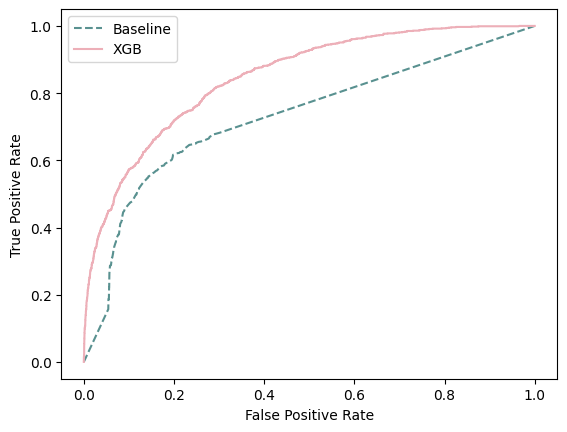

In [211]:
pyplot.plot(fprbl, tprbl, linestyle='--', label='Baseline', color='#599190')
pyplot.plot(fpr, tpr, label='XGB', color = '#edafb8')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [111]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_Val, y_pred_Val_xgb_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix=argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.638383, F-Score=0.525


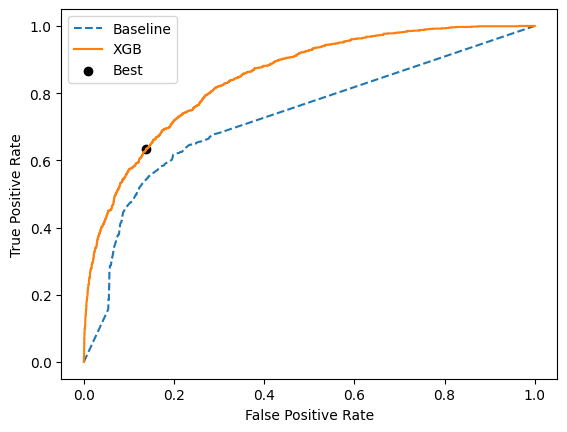

In [116]:
pyplot.plot(fprbl, tprbl, linestyle='--', label='Baseline')
pyplot.plot(fpr, tpr, label='XGB')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [114]:
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

In [115]:
thresholds = np.arange(0, 1, 0.001)
scores = [metrics.f1_score(y_Val, to_labels(y_pred_Val_xgb_proba, t)) for t in thresholds]
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.638, F-Score=0.52529


### Feature importance and feature selection

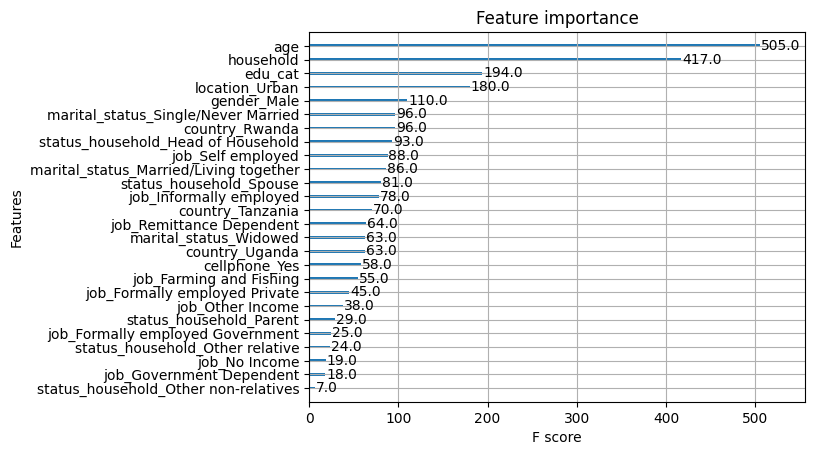

In [69]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb)
pyplot.show()

In [70]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb, X_Val, y_Val, n_repeats=30, random_state=RSEED, scoring = "recall")

Text(0.5, 0, 'Permutation Importance')

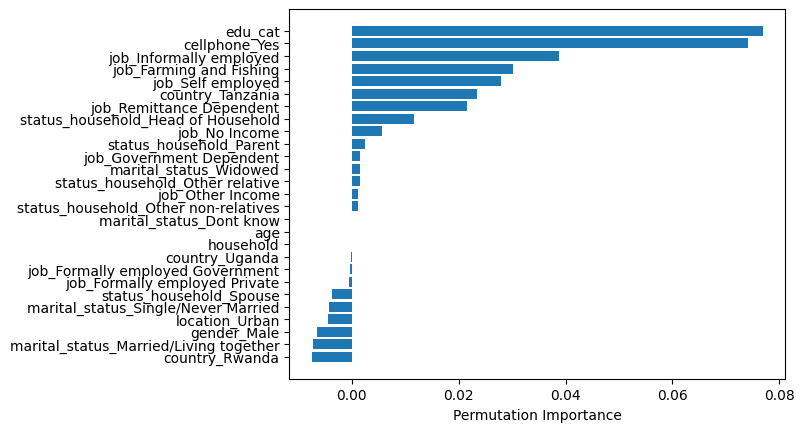

In [71]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_Val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [72]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_Train = selection.transform(processed_X_Train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_Train, y_Train)
    # eval model
    select_X_Val = selection.transform(X_Val)
    y_pred_eval = selection_model.predict(select_X_Val)
    predictions = [round(value) for value in y_pred_eval]
    Recall = metrics.recall_score(y_Val, predictions)
    print("Thresh=%.3f, n=%d, Recall: %.2f%%" % (thresh, select_X_Train.shape[1], Recall*100.0))

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=27, Recall: 8.65%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=26, Recall: 8.65%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=25, Recall: 16.10%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=24, Recall: 19.42%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=23, Recall: 22.43%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=22, Recall: 11.57%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=21, Recall: 17.20%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=20, Recall: 13.98%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.019, n=19, Recall: 16.40%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.019, n=18, Recall: 20.62%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=17, Recall: 76.46%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.022, n=16, Recall: 77.16%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.024, n=15, Recall: 76.56%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=14, Recall: 79.68%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=13, Recall: 79.07%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=12, Recall: 79.78%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.038, n=11, Recall: 81.69%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=10, Recall: 81.59%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.043, n=9, Recall: 81.99%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.052, n=8, Recall: 81.69%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.055, n=7, Recall: 79.48%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.056, n=6, Recall: 92.76%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.060, n=5, Recall: 92.76%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.081, n=4, Recall: 92.76%
Thresh=0.088, n=3, Recall: 24.45%
Thresh=0.090, n=2, Recall: 6.94%
Thresh=0.102, n=1, Recall: 0.00%


/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [73]:
selection = SelectFromModel(xgb, threshold=0.021, prefit=True)
select_X_Train = selection.transform(processed_X_Train)

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [74]:
selection_xgb = XGBClassifier()
selection_xgb.fit(select_X_Train, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
select_X_Val = selection.transform(X_Val)

/Users/johannakruger/neuefische/ml_project/.venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Error Analysis

In [117]:
index = X_Val.index

In [118]:
yhats = pd.Series(y_pred_Val_xgb, name ="Y_hats", index=index)

In [119]:
X_Val_err_an = pd.concat([X_Val, yhats, y_Val], axis=1)

In [120]:
def error_analysis(row):
    if row['bank_account'] == 0 and row['Y_hats'] == 0:
        return "TN"
    if row['bank_account'] == 1 and row['Y_hats'] == 1:
        return "TP"
    if row['bank_account'] == 0 and row['Y_hats'] == 1:
        return "FP"
    if row['bank_account'] == 1 and row['Y_hats'] == 0:
        return "FN"

In [121]:
X_Val_err_an['error_analysis'] = X_Val_err_an.apply(lambda row: error_analysis(row), axis=1)

In [122]:
TP = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "TP")]
TP.describe()

household         age  country_Rwanda  country_Tanzania  \
count  658.000000  658.000000      658.000000        658.000000   
mean     3.337386   39.249240        0.255319          0.199088   
std      2.083895   13.366234        0.436372          0.399618   
min      1.000000   19.000000        0.000000          0.000000   
25%      2.000000   29.000000        0.000000          0.000000   
50%      3.000000   36.000000        0.000000          0.000000   
75%      5.000000   46.000000        1.000000          0.000000   
max     17.000000   88.000000        1.000000          1.000000   

       country_Uganda  location_Urban  cellphone_Yes  gender_Male  \
count      658.000000      658.000000     658.000000   658.000000   
mean         0.045593        0.542553       0.990881     0.575988   
std          0.208759        0.498565       0.095127     0.494568   
min          0.000000        0.000000       0.000000     0.000000   
25%          0.000000        0.000000       1.000000     0.000000   
50%          0.000000        1.000000       1.000000     1.000000   
75%          0.000000        1.000000       1.000000     1.000000   
max          1.000000        1.000000       1.000000     1.000000   

       marital_status_Dont know  marital_status_Married/Living together  ...  \
count                     658.0                              658.000000  ...   
mean                        0.0                                0.547112  ...   
std                         0.0                                0.498154  ...   
min                         0.0                                0.000000  ...   
25%                         0.0                                0.000000  ...   
50%                         0.0                                1.000000  ...   
75%                         0.0                                1.000000  ...   
max                         0.0                                1.000000  ...   

       job_Remittance Dependent  job_Self employed  \
count                658.000000         658.000000   
mean                   0.059271           0.273556   
std                    0.236310           0.446123   
min                    0.000000           0.000000   
25%                    0.000000           0.000000   
50%                    0.000000           0.000000   
75%                    0.000000           1.000000   
max                    1.000000           1.000000   

       status_household_Head of Household  \
count                          658.000000   
mean                             0.726444   
std                              0.446123   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              1.000000   
max                              1.000000   

       status_household_Other non-relatives  status_household_Other relative  \
count                            658.000000                       658.000000   
mean                               0.004559                         0.010638   
std                                0.067420                         0.102670   
min                                0.000000                         0.000000   
25%                                0.000000                         0.000000   
50%                                0.000000                         0.000000   
75%                                0.000000                         0.000000   
max                                1.000000                         1.000000   

       status_household_Parent  status_household_Spouse     edu_cat  Y_hats  \
count               658.000000               658.000000  658.000000   658.0   
mean                  0.016717                 0.186930    3.420973     1.0   
std                   0.128308                 0.390152    1.169365     0.0   
min                   0.000000                 0.000000    0.000000     1.0   
25%                   0.000000                 0.000

In [123]:
FN = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "FN")]
FN.describe()

household         age  country_Rwanda  country_Tanzania  \
count  336.000000  336.000000      336.000000        336.000000   
mean     3.937500   42.226190        0.440476          0.187500   
std      2.334484   17.078468        0.497185          0.390894   
min      1.000000   16.000000        0.000000          0.000000   
25%      2.000000   29.000000        0.000000          0.000000   
50%      4.000000   37.000000        0.000000          0.000000   
75%      5.000000   53.250000        1.000000          0.000000   
max     13.000000   95.000000        1.000000          1.000000   

       country_Uganda  location_Urban  cellphone_Yes  gender_Male  \
count      336.000000      336.000000     336.000000   336.000000   
mean         0.056548        0.339286       0.928571     0.428571   
std          0.231321        0.474173       0.257923     0.495610   
min          0.000000        0.000000       0.000000     0.000000   
25%          0.000000        0.000000       1.000000     0.000000   
50%          0.000000        0.000000       1.000000     0.000000   
75%          0.000000        1.000000       1.000000     1.000000   
max          1.000000        1.000000       1.000000     1.000000   

       marital_status_Dont know  marital_status_Married/Living together  ...  \
count                     336.0                              336.000000  ...   
mean                        0.0                                0.488095  ...   
std                         0.0                                0.500604  ...   
min                         0.0                                0.000000  ...   
25%                         0.0                                0.000000  ...   
50%                         0.0                                0.000000  ...   
75%                         0.0                                1.000000  ...   
max                         0.0                                1.000000  ...   

       job_Remittance Dependent  job_Self employed  \
count                336.000000         336.000000   
mean                   0.101190           0.202381   
std                    0.302031           0.402374   
min                    0.000000           0.000000   
25%                    0.000000           0.000000   
50%                    0.000000           0.000000   
75%                    0.000000           0.000000   
max                    1.000000           1.000000   

       status_household_Head of Household  \
count                          336.000000   
mean                             0.616071   
std                              0.487066   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              1.000000   
max                              1.000000   

       status_household_Other non-relatives  status_household_Other relative  \
count                            336.000000                       336.000000   
mean                               0.017857                         0.026786   
std                                0.132630                         0.161697   
min                                0.000000                         0.000000   
25%                                0.000000                         0.000000   
50%                                0.000000                         0.000000   
75%                                0.000000                         0.000000   
max                                1.000000                         1.000000   

       status_household_Parent  status_household_Spouse     edu_cat  Y_hats  \
count               336.000000               336.000000  336.000000   336.0   
mean                  0.026786                 0.250000    1.970238     0.0   
std                   0.161697                 0.433659    0.967691     0.0   
min                   0.000000                 0.000000    0.000000     0.0   
25%                   0.000000                 0.000

In [124]:
TN = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "TN")]
TN.head(2)

household  age  country_Rwanda  country_Tanzania  country_Uganda  \
22542          6   70               0                 0               1   
19199          2   27               0                 1               0   

       location_Urban  cellphone_Yes  gender_Male  marital_status_Dont know  \
22542               0              1            0                         0   
19199               1              1            1                         0   

       marital_status_Married/Living together  ...  job_Self employed  \
22542                                       1  ...                  1   
19199                                       0  ...                  1   

       status_household_Head of Household  \
22542                                   1   
19199                                   1   

       status_household_Other non-relatives  status_household_Other relative  \
22542                                     0                                0   
19199                                     0                                0   

       status_household_Parent  status_household_Spouse  edu_cat  Y_hats  \
22542                        0                        0        0       0   
19199                        0                        0        3       0   

       bank_account  error_analysis  
22542             0              TN  
19199             0              TN  

[2 rows x 30 columns]

In [125]:
FP = X_Val_err_an.loc[(X_Val_err_an.error_analysis == "FP")]
FP.head(2)

household  age  country_Rwanda  country_Tanzania  country_Uganda  \
19053          1   22               0                 1               0   
4223           3   26               0                 0               0   

       location_Urban  cellphone_Yes  gender_Male  marital_status_Dont know  \
19053               0              1            1                         0   
4223                0              1            0                         0   

       marital_status_Married/Living together  ...  job_Self employed  \
19053                                       0  ...                  0   
4223                                        1  ...                  1   

       status_household_Head of Household  \
19053                                   1   
4223                                    0   

       status_household_Other non-relatives  status_household_Other relative  \
19053                                     0                                0   
4223                                      0                                1   

       status_household_Parent  status_household_Spouse  edu_cat  Y_hats  \
19053                        0                        0        5       1   
4223                         0                        0        2       1   

       bank_account  error_analysis  
19053             0              FP  
4223              0              FP  

[2 rows x 30 columns]